# where should I open a Chinese restaurant in new york city

## Business Problem

New york city has the largest Chinese population outside of Asia and houses thousands of Chinese restaurants. Originally Chinese restaurants in new york city were almost exclusively Chinese-American and Cantonese. They were concentrated in Chinatown. Recently more immigrants began streaming into new york city from multiple regions of China, bringing all kinds of authentic Chinese dishes. These authentic Chinese food almost look nothing like American Chinese food. They vary tremendously by region: Sichuan and Hunan cuisine are spicy, Shandong and Dongbei cuisine are generally salty and crispy, and Shanghai cuisine is famous for “red-cooking”. 

With an estimated Chinese population of 628,673 already, new york city’s demand for Chinese restaurant are continuously growing, especially for authentic Chinese restaurants. Here we explore which neighborhoods in new york city are suitable for opening a Chinese restaurant.  Because American Chinese restaurants are so different from authentic Chinese restaurants, so we will research them separately.

The target audiences are Chinese immigrants or business owners who want to open Chinese restaurant or grow their current business.


## Data description and acquisition

1)	Source 1: New York Neighborhoods via coursera server
Like what we did in the coursera lab, we download a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood from coursera server.

2)	Source 2: Venue Data using Foursquare
We use FourSquare API get all the venues in the neighborhoods of new York city, especially  Chinese restaurants.




### Data source 1: New York Neighborhoods via coursera server
Like what we did in the coursera lab, we download a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood from coursera server.


#### download and import all packages

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


#### Download and Explore New York Dataset as we practiced in the course.

In [803]:
import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
filename = 'newyork_data.json'
urllib.request.urlretrieve(url, filename)

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [804]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Get the latitude and longitude of each neighborhood in New York.

In [805]:
neighborhoods_data=newyork_data['features']
neighborhood_list=[]
for neighborhood_data in neighborhoods_data:
    neighborhood=neighborhood_data['properties']['name']
    borough=neighborhood_data['properties']['borough']
    lat=neighborhood_data['geometry']['coordinates'][1]
    lng=neighborhood_data['geometry']['coordinates'][0]
    neighborhood_list.append([neighborhood,borough,lat,lng])
neighborhoods=pd.DataFrame(neighborhood_list,columns=['neighborhood','borough','lat','lng'])
neighborhoods

,neighborhood,borough,lat,lng
0,Wakefield,Bronx,40.894705,-73.847201
1,Co-op City,Bronx,40.874294,-73.829939
2,Eastchester,Bronx,40.887556,-73.827806
3,Fieldston,Bronx,40.895437,-73.905643
4,Riverdale,Bronx,40.890834,-73.912585
5,Kingsbridge,Bronx,40.881687,-73.902818
6,Marble Hill,Manhattan,40.876551,-73.910660
7,Woodlawn,Bronx,40.898273,-73.867315
8,Norwood,Bronx,40.877224,-73.879391
9,Williamsbridge,Bronx,40.881039,-73.857446


In [806]:
neighborhoods.shape

(306, 4)

In [807]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  306 non-null    object 
 1   borough       306 non-null    object 
 2   lat           306 non-null    float64
 3   lng           306 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.7+ KB


###  Data source 2: Use Foursquare API to explore venues across 5 boroughs of New York city and we will focus on chinese restaurants venues


####  Use Foursquare API get all veunes for New York City (newyork_venues)

In [809]:
CLIENT_ID = 'XZGS2EYXHEGXKFACW1OXSUN5ZXSOZSVO5HKT31B1AQOBNB20' # your Foursquare ID
CLIENT_SECRET = 'YPTTPBJ3ZBNSUPJFZV4LDDHJ1PLRXZPGS4G52MZXAZLPJZEG' # your Foursquare Secret
VERSION = '20200418' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XZGS2EYXHEGXKFACW1OXSUN5ZXSOZSVO5HKT31B1AQOBNB20
CLIENT_SECRET:YPTTPBJ3ZBNSUPJFZV4LDDHJ1PLRXZPGS4G52MZXAZLPJZEG


In [810]:
def explore_nearby_venues(neighborhood,borough,latitude,longitude,radius=500):
    limit=100
    venue_lists=[]
    for neighborhood,borough,lat,lng in zip(neighborhood,borough,latitude,longitude):
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            limit)
        #print(url)
        results=requests.get(url).json()
        #print(results)
        try:
            venues=results['response']['groups'][0]['items']
        
            for venues_1 in venues:
                venue=venues_1['venue']['name']
                category=venues_1['venue']['categories'][0]['name']
                latitude=venues_1['venue']['location']['lat']
                longitude=venues_1['venue']['location']['lng']
                venue_lists.append([neighborhood,borough,lat,lng,venue,category,latitude,longitude])
        except:
            pass
        
    nearby_venues=pd.DataFrame(venue_lists, columns=['neighborhood','borough','n_lat','n_lng','venue','category','venue_lat','venue_lng'])
    return(nearby_venues)

In [811]:
newyork_venues=explore_nearby_venues(neighborhoods['neighborhood'],neighborhoods['borough'],neighborhoods['lat'],neighborhoods['lng'])


In [1074]:
newyork_venues.head()

,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng
0,Wakefield,Bronx,40.894705,-73.847201,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Wakefield,Bronx,40.894705,-73.847201,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
2,Wakefield,Bronx,40.894705,-73.847201,Walgreens,Pharmacy,40.896528,-73.844700
3,Wakefield,Bronx,40.894705,-73.847201,Rite Aid,Pharmacy,40.896649,-73.844846
4,Wakefield,Bronx,40.894705,-73.847201,Dunkin',Donut Shop,40.890459,-73.849089


In [812]:
print(newyork_venues.shape)
print(len(newyork_venues['category'].unique()))

(10127, 8)
439


There are 10127 venues in 5 boroughs of new york city, and the they belongs to 439 different category.

The code below is just to make sure we didn't miss any neighborhoods.

In [1071]:
neighborhood_count=newyork_venues.groupby(['borough','neighborhood']).count().reset_index()
print(len(neighborhood_count))
neighborhoods[~(neighborhoods['neighborhood'].isin(neighborhood_count['neighborhood']))]
newyork_venues[newyork_venues['neighborhood']=='Edgewater Park']
troubleshoot=neighborhoods.merge(neighborhood_count, how ='left',on=['borough','neighborhood'])
#troubleshoot[troubleshoot['venue'].isnull()]

306


#### Select all the Chinese restaurant venues from new york venues data.  

In [814]:
chinese_res=newyork_venues[(newyork_venues['category']=='Shanghai Restaurant')|
                            (newyork_venues['category']=='Cantonese Restaurant')|
                            (newyork_venues['category']=='Szechuan Restaurant')|
                            (newyork_venues['category']=='Hotpot Restaurant')|
                            (newyork_venues['category']=='Hunan Restaurant')|
                            (newyork_venues['category']=='Dim Sum Restaurant')|
                            (newyork_venues['category']=='Dumpling Restaurant')|
                            (newyork_venues['category']=='Chinese Restaurant')|
                            newyork_venues['venue'].str.contains('Hand Pull Noodle')].reset_index(drop=True)
print(chinese_res.shape)
chinese_res.head()

(267, 8)


,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng
0,Co-op City,Bronx,40.874294,-73.829939,Guang Hui Chinese Restaurant,Chinese Restaurant,40.876651,-73.829092
1,Eastchester,Bronx,40.887556,-73.827806,Xing Lung Chinese Restaurant,Chinese Restaurant,40.888785,-73.831226
2,Norwood,Bronx,40.877224,-73.879391,Sing Fei Chinese Restaurant,Chinese Restaurant,40.879907,-73.875307
3,Norwood,Bronx,40.877224,-73.879391,Happy Dragon,Chinese Restaurant,40.880410,-73.883442
4,Pelham Parkway,Bronx,40.857413,-73.854756,Mr. Q's Chinese Restaurant,Chinese Restaurant,40.855790,-73.855455


Out of 10106 venues in 5 boroughs of new york city, 267 of them are Chinese restaurants. 

## Methodology

### Explore chinese restaurants venues

I separate all Chinese restaurants into 2 main types：American Chinese restaurant and authentic Chinese restaurants. Because their dishes, locations and customers are very different from each other, so we might get better information if we separate them.

American Chinese restaurant was filtered by the criteria that name of venue contains most common American Chinese word such as “Great Wall”, “Wok”, “Dragon”, “Golden”, “China”, “Panda” and “lucky”.

Authentic Chinese restaurant was filtered by the criteria that the venues category is one of these: ‘Szechuan Restaurant’, ‘Hunan Restaurant’, ‘Hotpot Restaurant’ or ‘Dim Sum Restaurant’, ‘Cantoese Restaurant’...


In [815]:
ame_chinese_res=chinese_res[chinese_res['venue'].str.contains('Wok')|
                            chinese_res['venue'].str.contains('Great Wall')|
                            chinese_res['venue'].str.contains('Dragon')|
                            chinese_res['venue'].str.contains('Jade')|
                            chinese_res['venue'].str.contains('Golden')|
                            chinese_res['venue'].str.contains('Express')|
                            chinese_res['venue'].str.contains('Wong')|
                            chinese_res['venue'].str.contains('Yee')|
                            chinese_res['venue'].str.contains('Garden')|
                            chinese_res['venue'].str.contains('China')|
                            chinese_res['venue'].str.contains('Panda')|
                            chinese_res['venue'].str.contains('Lotus')|
                            chinese_res['venue'].str.contains('King')|
                            chinese_res['venue'].str.contains('Number One')|
                            chinese_res['venue'].str.contains('Number 1')|
                            chinese_res['venue'].str.contains('No. 1')|
                            chinese_res['venue'].str.contains('Chinese')|
                            chinese_res['venue'].str.contains('Empire')|
                            chinese_res['venue'].str.contains('Happy')|
                            chinese_res['venue'].str.contains('Lucky')|
                            chinese_res['venue'].str.contains('Crown')].reset_index(drop=True)
                          


In [818]:
aut_chinese_res=chinese_res[(chinese_res['category']=='Shanghai Restaurant')|
                            (chinese_res['category']=='Cantonese Restaurant')|
                            (chinese_res['category']=='Szechuan Restaurant')|
                            (chinese_res['category']=='Hotpot Restaurant')|
                            (chinese_res['category']=='Hunan Restaurant')|
                            (chinese_res['category']=='Dim Sum Restaurant')|
                            (chinese_res['category']=='Dumpling Restaurant')|
                            chinese_res['venue'].str.contains('Bei')|
                            chinese_res['venue'].str.contains("Xi'an")|
                            chinese_res['venue'].str.contains('Lanzhou')|
                            chinese_res['venue'].str.contains('Hand Pull Noodle')].reset_index(drop=True)
print(ame_chinese_res.shape)
print(aut_chinese_res.shape)

(114, 8)
(53, 8)


In [1072]:
aut_chinese_res.groupby(['borough','neighborhood']).count().sort_values(by=['venue'],ascending=False).head(5)

n_lat  n_lng  venue  category  venue_lat  venue_lng
borough   neighborhood                                                     
Manhattan Chinatown        10     10     10        10         10         10
Queens    Flushing         10     10     10        10         10         10
Brooklyn  Bath Beach        2      2      2         2          2          2
          Bensonhurst       2      2      2         2          2          2
          Downtown          2      2      2         2          2          2

#### Label all Chinese Restaurant on New York City map, authentic Chinese restrautants in red, americanized Chinese restaurants in blue

In [1079]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of New York using latitude and longitude values
map_newyork_chinese_res= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, venue, neighborhood in zip(chinese_res['venue_lat'], chinese_res['venue_lng'], chinese_res['venue'], chinese_res['neighborhood']):
    label = '{}, {}'.format(neighborhood, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#15000cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_chinese_res) 
    
for lat, lng, venue, neighborhood in zip(ame_chinese_res['venue_lat'], ame_chinese_res['venue_lng'], ame_chinese_res['venue'], ame_chinese_res['neighborhood']):
    label = '{}, {}'.format(neighborhood, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3866cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_chinese_res)  
    
for lat, lng, venue, neighborhood in zip(aut_chinese_res['venue_lat'], aut_chinese_res['venue_lng'], aut_chinese_res['venue'], aut_chinese_res['neighborhood']):
    label = '{}, {}'.format(neighborhood, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF0200',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_chinese_res) 
    
map_newyork_chinese_res

In [1080]:
delay=5
 
#Save the map as an HTML file
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_newyork_chinese_res.save(fn)
 
#Open a browser window...
browser = webdriver.Chrome()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('chinese-restaurants.png')
#Close the browser
browser.quit()

### Cluster all neighborhoods in New York city 

#### Get the top 10 most common venues in each neighborhood

In [820]:
num_top_venues=10
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create columns according to number of top venues
columns = ['neighborhood','borough']
for ind in np.arange(num_top_venues):
    #print(ind)
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
print(columns)

['neighborhood', 'borough', '1th Most Common Venue', '2th Most Common Venue', '3th Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue', '10th Most Common Venue']


In [821]:
def top_10_venues(venues):
        
    # transfer venues from category variable to numerical variable
    one_hot=pd.get_dummies(venues[['category']],prefix='',prefix_sep='')
    # add 'neighborhood' column to one_hot
    one_hot['neighborhood']=venues['neighborhood']
    one_hot['borough']=venues['borough']
    # move 'neighborhood' column to the first column
    fixed_columns=list(one_hot.columns[-2:])+list(one_hot.columns[:-2])
    one_hot=one_hot[fixed_columns]
    
    
    # get the mean value of venues in each neighborhood
    grouped=one_hot.groupby(['borough','neighborhood']).mean().reset_index()
    #print(grouped.head(10))
    #print(grouped.shape)
    
    
    # get the top 10 venues in each neighborhood
    venues_sorted = pd.DataFrame(columns=columns)
    venues_sorted['neighborhood'] = grouped['neighborhood']
    venues_sorted['borough']=grouped['borough']
    for ind in np.arange(grouped.shape[0]):
        venues_sorted.iloc[ind, 2:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)
        
    venues_sorted_ch=venues_sorted[venues_sorted.stack().str.contains('Chinese Restaurant').any(level=0)].reset_index(drop=True)
    venues_sorted_ch_1=venues_sorted[venues_sorted['1th Most Common Venue']=='Chinese Restaurant']
    venues_sorted_ch_2=venues_sorted[venues_sorted['2th Most Common Venue']=='Chinese Restaurant']
    venues_sorted_ch_3=venues_sorted[venues_sorted['3th Most Common Venue']=='Chinese Restaurant']

    return grouped,venues_sorted,venues_sorted_ch,venues_sorted_ch_1,venues_sorted_ch_2,venues_sorted_ch_3



In [882]:
grouped,top_10,top_10_ch,ch_1,ch_2,ch_3=top_10_venues(newyork_venues)

In [823]:
grouped.shape

(306, 441)

Debug code

In [1081]:
#print(grouped.shape)
#a=neighborhoods['neighborhood']
#b=grouped['neighborhood']
#print(a.shape)
#print(b.shape)
#neighborhoods[~(a.isin(b))]
#len(newyork_venues['neighborhood'].unique())
#len(neighborhoods['neighborhood'].unique())


In [1083]:
print(top_10.shape)
print(top_10_ch.shape)
top_10.head()

(306, 13)
(84, 12)


,Cluster Labels,neighborhood,borough,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7,Allerton,Bronx,Pizza Place,Supermarket,Discount Store,Pharmacy,Deli / Bodega,Breakfast Spot,Spa,Gas Station,Playground,Bike Trail
1,7,Baychester,Bronx,Discount Store,Donut Shop,Pet Store,Spanish Restaurant,Men's Store,Fast Food Restaurant,Mattress Store,Gym / Fitness Center,Bank,Electronics Store
2,7,Bedford Park,Bronx,Chinese Restaurant,Diner,Pizza Place,Mexican Restaurant,Deli / Bodega,Sandwich Place,Convenience Store,Park,Smoke Shop,Grocery Store
3,7,Belmont,Bronx,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Spanish Restaurant,Bank,Grocery Store,Shoe Store,Donut Shop
4,7,Bronxdale,Bronx,Chinese Restaurant,Mexican Restaurant,Pizza Place,Spanish Restaurant,Performing Arts Venue,Breakfast Spot,Gym,Eastern European Restaurant,Bank,Italian Restaurant


#### Find the best K for K-Means Cluster

In [28]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [851]:
newyork_grouped_cluster=grouped.drop(columns=['borough','neighborhood'])

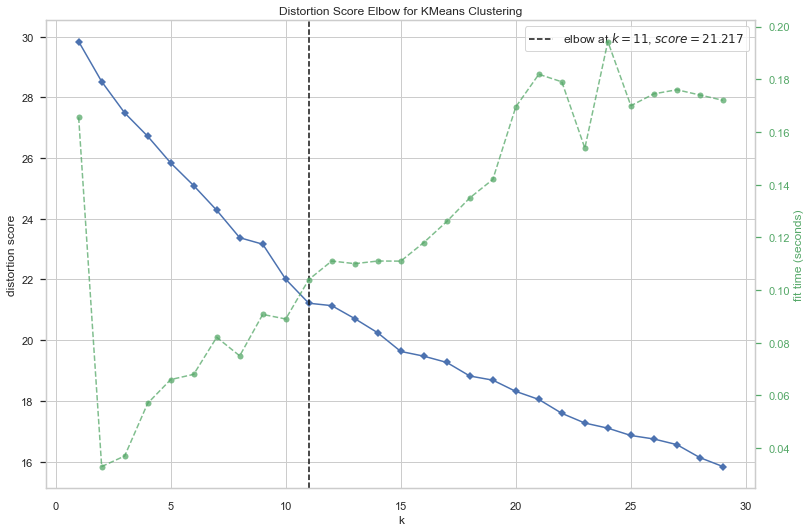

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [881]:
#Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,30))
visualizer.fit(newyork_grouped_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Find top10 most common venues for each neighborhood

In [883]:
kclusters=11
newyork_grouped_cluster=grouped.drop(columns=['neighborhood','borough'])
newyork_grouped_cluster.head()

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=kclusters,random_state=0).fit(newyork_grouped_cluster)
print(kmeans.labels_[:9])


[ 7  7  7  7  7  7  0 10  2]


In [884]:
top_10.insert(0, 'Cluster Labels', kmeans.labels_)

In [885]:
top_10.head()

,Cluster Labels,neighborhood,borough,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7,Allerton,Bronx,Pizza Place,Supermarket,Discount Store,Pharmacy,Deli / Bodega,Breakfast Spot,Spa,Gas Station,Playground,Bike Trail
1,7,Baychester,Bronx,Discount Store,Donut Shop,Pet Store,Spanish Restaurant,Men's Store,Fast Food Restaurant,Mattress Store,Gym / Fitness Center,Bank,Electronics Store
2,7,Bedford Park,Bronx,Chinese Restaurant,Diner,Pizza Place,Mexican Restaurant,Deli / Bodega,Sandwich Place,Convenience Store,Park,Smoke Shop,Grocery Store
3,7,Belmont,Bronx,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Spanish Restaurant,Bank,Grocery Store,Shoe Store,Donut Shop
4,7,Bronxdale,Bronx,Chinese Restaurant,Mexican Restaurant,Pizza Place,Spanish Restaurant,Performing Arts Venue,Breakfast Spot,Gym,Eastern European Restaurant,Bank,Italian Restaurant


#### View different clusters on map

In [886]:

newyork_merged = neighborhoods

# merge toronto_grouped with manhattan_data to add latitude/longitude for each neighborho
newyork_merged = newyork_merged.merge(top_10, how='right',on=['neighborhood','borough'])
print(set(newyork_merged['Cluster Labels']))
print(newyork_merged.shape)
newyork_merged.head()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
(306, 15)


,neighborhood,borough,lat,lng,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Bronx,40.865788,-73.859319,7,Pizza Place,Supermarket,Discount Store,Pharmacy,Deli / Bodega,Breakfast Spot,Spa,Gas Station,Playground,Bike Trail
1,Baychester,Bronx,40.866858,-73.835798,7,Discount Store,Donut Shop,Pet Store,Spanish Restaurant,Men's Store,Fast Food Restaurant,Mattress Store,Gym / Fitness Center,Bank,Electronics Store
2,Bedford Park,Bronx,40.870185,-73.885512,7,Chinese Restaurant,Diner,Pizza Place,Mexican Restaurant,Deli / Bodega,Sandwich Place,Convenience Store,Park,Smoke Shop,Grocery Store
3,Belmont,Bronx,40.857277,-73.888452,7,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Spanish Restaurant,Bank,Grocery Store,Shoe Store,Donut Shop
4,Bronxdale,Bronx,40.852723,-73.861726,7,Chinese Restaurant,Mexican Restaurant,Pizza Place,Spanish Restaurant,Performing Arts Venue,Breakfast Spot,Gym,Eastern European Restaurant,Bank,Italian Restaurant


In [1101]:
import numpy as np
address = 'New York City, New York'
geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
map_clusters=folium.Map(location=[latitude, longitude],zoom_start=11)
map_clusters
x=np.arange(kclusters)
print(range(kclusters))
ys=[i+x+(i*x)**2 for i in range(kclusters)]
ys

import matplotlib.cm as cm
import matplotlib.colors as colors
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
colors_array
rainbow=[colors.rgb2hex(i) for i in colors_array]
rainbow

markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['lat'], newyork_merged['lng'], newyork_merged['neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of New York City are 40.7127281, -74.0060152.
range(0, 11)


In [1102]:
delay=5
 
#Save the map as an HTML file
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_clusters.save(fn)
 
#Open a browser window...
browser = webdriver.Chrome()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('11-clusters-of-new-york-city-neighborhoods.png')
#Close the browser
browser.quit()

#### Explore 11 different clusters

Visualize these 11 clusters

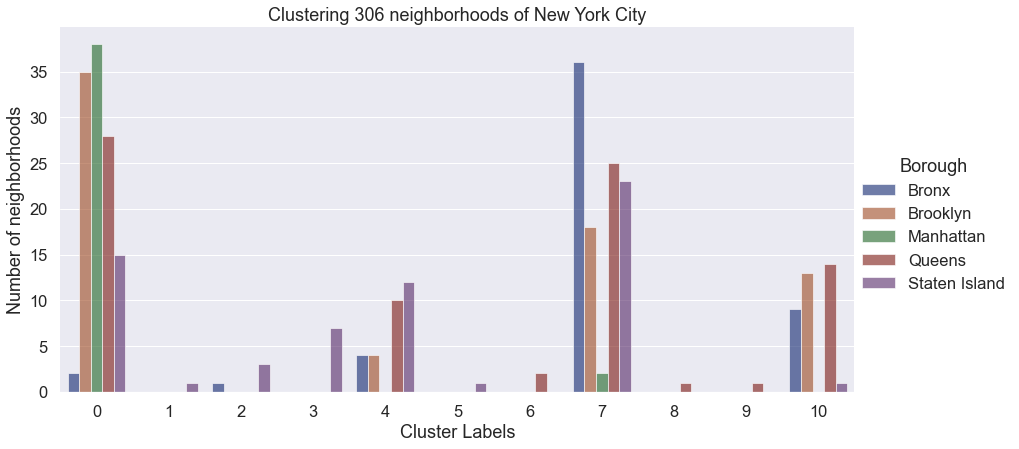

In [1070]:
newyork_merged_view_1=newyork_merged.iloc[:,:5].groupby(['Cluster Labels']).count().reset_index()
newyork_merged_view_2=newyork_merged.iloc[:,:5].groupby(['borough','Cluster Labels']).count().reset_index()
newyork_merged_view=newyork_merged.iloc[:,:5].groupby(['Cluster Labels','borough']).count().reset_index()
newyork_merged_view


import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)

# Draw a nested barplot by species and sex
g = sns.catplot(data=newyork_merged_view, kind="bar",
    x="Cluster Labels", y="neighborhood", hue="borough",
    ci="sd", palette="dark", alpha=.6, height=6,aspect=2
)
g.despine(left=True)
g.set(title="Clustering 306 neighborhoods of New York City")


g.set_axis_labels("Cluster Labels", "Number of neighborhoods")
g.legend.set_title("Borough")
g.savefig('clustering 306 neighborhoods of new york city')


In [1084]:
newyork_merged_view_1

,Cluster Labels,neighborhood,borough,lat,lng
0,0,118,118,118,118
1,1,1,1,1,1
2,2,4,4,4,4
3,3,7,7,7,7
4,4,30,30,30,30
5,5,1,1,1,1
6,6,2,2,2,2
7,7,104,104,104,104
8,8,1,1,1,1
9,9,1,1,1,1


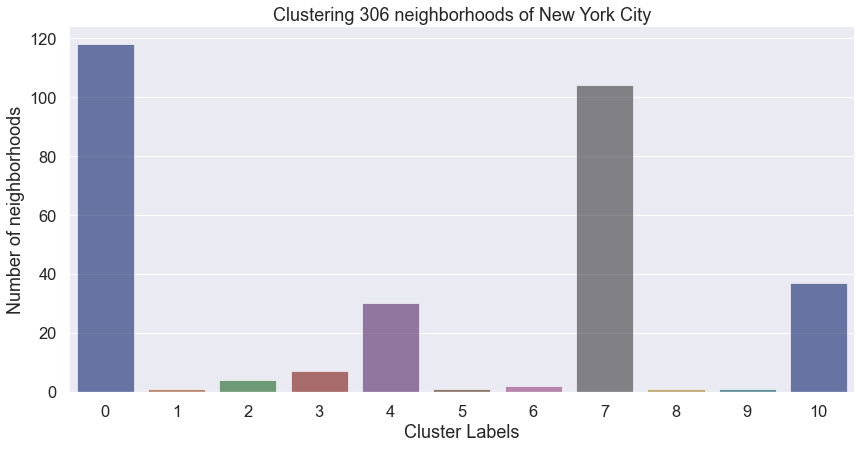

In [1089]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.5)

# Draw a nested barplot by species and sex
g_1 = sns.catplot(data=newyork_merged_view_1, kind="bar",
    x="Cluster Labels", y="neighborhood",
    ci="sd", palette="dark", alpha=.6, height=6,aspect=2
)
g_1.despine(left=True)
g_1.set(title="Clustering 306 neighborhoods of New York City")
g_1.set_axis_labels("Cluster Labels", "Number of neighborhoods")
g_1.savefig('clustering 306 neighborhoods of new york city')

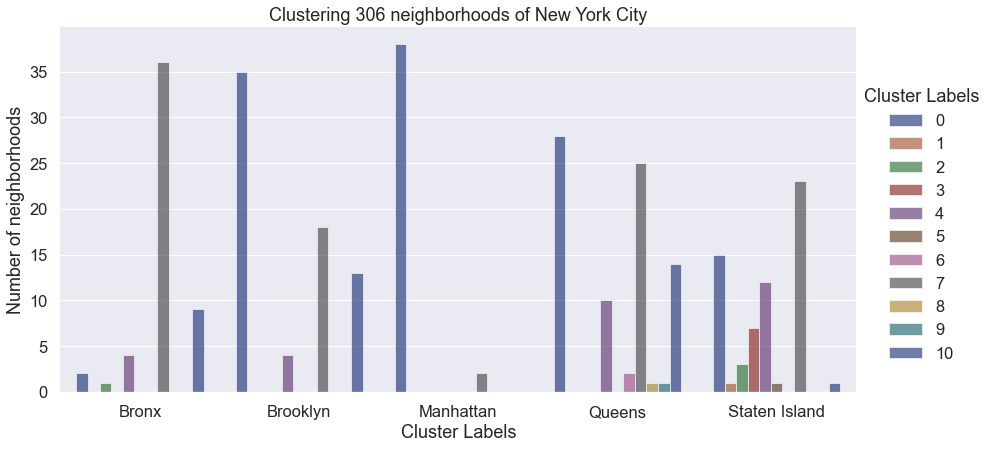

In [928]:
# Draw a nested barplot by species and sex
f = sns.catplot(data=newyork_merged_view, kind="bar",
    x="borough", y="neighborhood", hue="Cluster Labels",
    ci="sd", palette="dark", alpha=.6, height=6,aspect=2
)
f.despine(left=True)
f.set(title="Clustering 306 neighborhoods of New York City")


f.set_axis_labels("Cluster Labels", "Number of neighborhoods")
f.legend.set_title("Cluster Labels")

In [985]:
newyork_merged_view_1

,Cluster Labels,neighborhood,borough,lat,lng
0,0,118,118,118,118
1,1,1,1,1,1
2,2,4,4,4,4
3,3,7,7,7,7
4,4,30,30,30,30
5,5,1,1,1,1
6,6,2,2,2,2
7,7,104,104,104,104
8,8,1,1,1,1
9,9,1,1,1,1


In [931]:
#newyork_merged_view_2

In [890]:
cluster0=newyork_merged[newyork_merged['Cluster Labels']==0].drop(columns=['lat','lng'])
cluster1=newyork_merged[newyork_merged['Cluster Labels']==1].drop(columns=['lat','lng'])
cluster2=newyork_merged[newyork_merged['Cluster Labels']==2].drop(columns=['lat','lng'])
cluster3=newyork_merged[newyork_merged['Cluster Labels']==3].drop(columns=['lat','lng'])
cluster4=newyork_merged[newyork_merged['Cluster Labels']==4].drop(columns=['lat','lng'])
cluster5=newyork_merged[newyork_merged['Cluster Labels']==5].drop(columns=['lat','lng'])
cluster6=newyork_merged[newyork_merged['Cluster Labels']==6].drop(columns=['lat','lng'])
cluster7=newyork_merged[newyork_merged['Cluster Labels']==7].drop(columns=['lat','lng'])
cluster8=newyork_merged[newyork_merged['Cluster Labels']==8].drop(columns=['lat','lng'])
cluster9=newyork_merged[newyork_merged['Cluster Labels']==9].drop(columns=['lat','lng'])
cluster10=newyork_merged[newyork_merged['Cluster Labels']==10].drop(columns=['lat','lng'])



####  Group all the venues by Cluster and see the top 10 most common venues of each Cluster.

In [ ]:
grouped_explore=grouped.copy()
grouped_explore.insert(0, 'Cluster Labels', kmeans.labels_)

In [892]:
grouped_explore_1=grouped_explore.groupby('Cluster Labels').mean().reset_index()

In [842]:
num_top_venues_1=10
def return_most_common_venues_1(row, num_top_venues_1):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create columns according to number of top venues
columns_1 = ['Cluster Labels']
for ind in np.arange(num_top_venues_1):
    #print(ind)
    try:
        columns_1.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns_1.append('{}th Most Common Venue'.format(ind+1))
print(columns_1)

['Cluster Labels', '1th Most Common Venue', '2th Most Common Venue', '3th Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue', '10th Most Common Venue']


In [893]:
grouped_explore_sorted = pd.DataFrame(columns=columns_1)
grouped_explore_sorted['Cluster Labels'] = grouped_explore_1['Cluster Labels']
   

for ind in np.arange(grouped_explore_1.shape[0]):
       grouped_explore_sorted.iloc[ind, 1:] = return_most_common_venues_1(grouped_explore_1.iloc[ind, 1:], num_top_venues_1)

In [894]:
grouped_explore_sorted

,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Coffee Shop,Italian Restaurant,Pizza Place,Bar,Café,Deli / Bodega,Bakery,Park,American Restaurant,Grocery Store
1,1,Bar,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store
2,2,Boat or Ferry,Park,Bus Stop,Grocery Store,Bus Station,Neighborhood,Beach,Pool,Convenience Store,Playground
3,3,Bus Stop,Burger Joint,American Restaurant,Deli / Bodega,Coffee Shop,Park,Recreation Center,Theme Park,Golf Course,Bagel Shop
4,4,Deli / Bodega,Pizza Place,Italian Restaurant,Bus Stop,Supermarket,American Restaurant,Caribbean Restaurant,Coffee Shop,Chinese Restaurant,Gym
5,5,Trail,Park,Yoga Studio,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
6,6,Beach,Supermarket,Trail,Monument / Landmark,Food,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
7,7,Pizza Place,Sandwich Place,Bank,Pharmacy,Donut Shop,Deli / Bodega,Grocery Store,Chinese Restaurant,Italian Restaurant,Mexican Restaurant
8,8,Park,Yoga Studio,Food,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
9,9,Playground,Yoga Studio,Food,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market


Browse each cluster

Cluster 1, 5,8,9 only has 1 neighborhood each; Cluster 6 has 2 neighborhoods; cluster 2 has 4 neighborhoods; cluster 3 has 7 neighborhoods and all of them are from Staten Island. 
We can list them together.

In [1090]:
newyork_merged[newyork_merged['Cluster Labels'].isin([1,5,8,9,6,2,3])]

,neighborhood,borough,lat,lng,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Clason Point,Bronx,40.806551,-73.854144,2,Park,Boat or Ferry,Bus Stop,South American Restaurant,Convenience Store,Grocery Store,Pool,Playground,Flea Market,Farmers Market
168,Bayswater,Queens,40.611322,-73.765968,9,Playground,Yoga Studio,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop
174,Breezy Point,Queens,40.557401,-73.925512,6,Beach,Supermarket,Trail,Monument / Landmark,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
214,Neponsit,Queens,40.572037,-73.857547,6,Beach,Yoga Studio,Food,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
231,Somerville,Queens,40.597711,-73.796648,8,Park,Yoga Studio,Food,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
245,Arlington,Staten Island,40.635325,-74.165104,3,Bus Stop,Deli / Bodega,Coffee Shop,American Restaurant,Grocery Store,Food,Farm,Farmers Market,Fast Food Restaurant,Field
248,Bloomfield,Staten Island,40.605779,-74.187256,3,Recreation Center,Burger Joint,Bus Stop,Theme Park,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
262,Graniteville,Staten Island,40.620172,-74.153152,2,Bus Station,Bus Stop,Boat or Ferry,Grocery Store,Yoga Studio,Food & Drink Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
269,Howland Hook,Staten Island,40.638433,-74.186223,2,Boat or Ferry,Yoga Studio,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market
275,New Brighton,Staten Island,40.640615,-74.087017,3,Bus Stop,Deli / Bodega,Park,Discount Store,Bowling Alley,Playground,Food,Farmers Market,Fast Food Restaurant,Field


In [940]:
cluster0

,neighborhood,borough,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,City Island,Bronx,0,Seafood Restaurant,Thrift / Vintage Store,Deli / Bodega,Pizza Place,Spanish Restaurant,Music Venue,Smoke Shop,Grocery Store,Boat or Ferry,Park
38,Port Morris,Bronx,0,Latin American Restaurant,Baseball Field,Brewery,Spanish Restaurant,Donut Shop,Distillery,Restaurant,Peruvian Restaurant,Storage Facility,Furniture / Home Store
52,Bath Beach,Brooklyn,0,Bubble Tea Shop,Gas Station,Halal Restaurant,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Chinese Restaurant,Donut Shop,Pharmacy,Cantonese Restaurant
53,Bay Ridge,Brooklyn,0,Pizza Place,Spa,Greek Restaurant,Italian Restaurant,American Restaurant,Chinese Restaurant,Bar,Bagel Shop,Sandwich Place,Café
54,Bedford Stuyvesant,Brooklyn,0,Coffee Shop,Bar,Pizza Place,Café,Deli / Bodega,Playground,Community Center,Bagel Shop,Tiki Bar,Basketball Court
57,Boerum Hill,Brooklyn,0,Coffee Shop,Bar,Dance Studio,French Restaurant,Furniture / Home Store,Sandwich Place,Bakery,Arts & Crafts Store,Yoga Studio,Kids Store
59,Brighton Beach,Brooklyn,0,Restaurant,Russian Restaurant,Eastern European Restaurant,Sushi Restaurant,Bank,Gourmet Shop,Mobile Phone Shop,Beach,Pharmacy,Supplement Shop
61,Brooklyn Heights,Brooklyn,0,Deli / Bodega,Yoga Studio,Cosmetics Shop,Gym,Bar,Pharmacy,Park,Plaza,Coffee Shop,Pizza Place
63,Bushwick,Brooklyn,0,Deli / Bodega,Bar,Mexican Restaurant,Coffee Shop,Discount Store,Thrift / Vintage Store,Café,Vegetarian / Vegan Restaurant,Chinese Restaurant,Bakery
65,Carroll Gardens,Brooklyn,0,Italian Restaurant,Coffee Shop,Pizza Place,Bakery,Cocktail Bar,Spa,Wine Shop,Bar,French Restaurant,Food & Drink Shop


Cluster 0 has 118 neighborhoods, the top 5 common venues are coffee shop, Italian restaurant, pizza place, bar and café.

Cluster 0 includes most of manhattan neighborhoods, Brooklyn downtown and waterfront neighborhoods, and other populated neighborhoods in queens, staten island and Bronx. 

Cluster 0 neighborhoods are very busy and popular area with large amount of foot traffic, lots of business, restaurants, stores and night life.

Cluster 3 has 7 neighborhoods, and all of them are from Staten Island. The top 5 most common venues are bus stop, burger joint, American restaurant, deli/bodega and coffee shop.

In [942]:
cluster4

,neighborhood,borough,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Edgewater Park,Bronx,4,Italian Restaurant,Deli / Bodega,Pizza Place,Coffee Shop,Chinese Restaurant,Asian Restaurant,Ice Cream Shop,Park,Donut Shop,Spa
33,Olinville,Bronx,4,Supermarket,Caribbean Restaurant,Liquor Store,Deli / Bodega,Food,Basketball Court,Convenience Store,Pizza Place,Fishing Store,Flea Market
43,Throgs Neck,Bronx,4,Deli / Bodega,Asian Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Sports Bar,Mobile Phone Shop,Bar,Juice Bar,Italian Restaurant
51,Woodlawn,Bronx,4,Deli / Bodega,Bar,Food Truck,Pizza Place,Playground,Convenience Store,Food & Drink Shop,Park,Grocery Store,Trail
64,Canarsie,Brooklyn,4,Deli / Bodega,Thai Restaurant,Caribbean Restaurant,Gym,Asian Restaurant,Food,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
77,East New York,Brooklyn,4,Deli / Bodega,Fried Chicken Joint,Fast Food Restaurant,Home Service,Pizza Place,Plaza,Caribbean Restaurant,Fishing Store,Falafel Restaurant,Farm
96,Marine Park,Brooklyn,4,Deli / Bodega,Athletics & Sports,Gym,Chinese Restaurant,Basketball Court,Coffee Shop,Pizza Place,Baseball Field,Dive Bar,Design Studio
102,Ocean Hill,Brooklyn,4,Deli / Bodega,Fried Chicken Joint,Bus Stop,Southern / Soul Food Restaurant,Chinese Restaurant,Bakery,Ice Cream Shop,Supermarket,Grocery Store,Mexican Restaurant
173,Blissville,Queens,4,Deli / Bodega,Donut Shop,Cafeteria,Sporting Goods Shop,Movie Theater,Skating Rink,Thai Restaurant,Clothing Store,Bar,Mattress Store
176,Broad Channel,Queens,4,Deli / Bodega,Other Nightlife,Dive Bar,Pizza Place,Sporting Goods Shop,Yoga Studio,Flower Shop,Farm,Farmers Market,Fast Food Restaurant


Cluster 4 has 30 neighborhoods, the top 5 common venues are deli/bodega, pizza place, Italian restaurant, bus stop and supermarket.

In [943]:
cluster7

,neighborhood,borough,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Bronx,7,Pizza Place,Supermarket,Discount Store,Pharmacy,Deli / Bodega,Breakfast Spot,Spa,Gas Station,Playground,Bike Trail
1,Baychester,Bronx,7,Discount Store,Donut Shop,Pet Store,Spanish Restaurant,Men's Store,Fast Food Restaurant,Mattress Store,Gym / Fitness Center,Bank,Electronics Store
2,Bedford Park,Bronx,7,Chinese Restaurant,Diner,Pizza Place,Mexican Restaurant,Deli / Bodega,Sandwich Place,Convenience Store,Park,Smoke Shop,Grocery Store
3,Belmont,Bronx,7,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Spanish Restaurant,Bank,Grocery Store,Shoe Store,Donut Shop
4,Bronxdale,Bronx,7,Chinese Restaurant,Mexican Restaurant,Pizza Place,Spanish Restaurant,Performing Arts Venue,Breakfast Spot,Gym,Eastern European Restaurant,Bank,Italian Restaurant
5,Castle Hill,Bronx,7,Deli / Bodega,Diner,Bank,Pizza Place,Market,Park,Pharmacy,Fountain,Fish & Chips Shop,Falafel Restaurant
9,Co-op City,Bronx,7,Pizza Place,Fast Food Restaurant,Baseball Field,Bagel Shop,Park,Donut Shop,Post Office,Chinese Restaurant,Grocery Store,Pharmacy
11,Concourse Village,Bronx,7,Sandwich Place,Deli / Bodega,Pizza Place,Fast Food Restaurant,Pharmacy,Mexican Restaurant,Donut Shop,Cosmetics Shop,Post Office,Discount Store
12,Country Club,Bronx,7,Sandwich Place,Playground,Athletics & Sports,Yoga Studio,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant
13,East Tremont,Bronx,7,Pizza Place,Deli / Bodega,Cosmetics Shop,Shoe Store,Mobile Phone Shop,Chinese Restaurant,Bank,Lounge,Breakfast Spot,Donut Shop


Cluster 7 has 104 neighborhoods. only 2 of them are located in Manhattan, all other 102 are from other 4 boroughs of new york city.

Cluster 7 neighborhoods are relatively less busy residential areas compared to cluster 0. The top 5 most common venues are pizza place, sandwich place, bank, pharmacy and donut shop.

In [944]:
cluster10

,neighborhood,borough,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Claremont Village,Bronx,10,Bus Station,Grocery Store,Deli / Bodega,Bakery,Pizza Place,Gift Shop,Chinese Restaurant,Park,Gym,Liquor Store
10,Concourse,Bronx,10,Grocery Store,Bus Station,Deli / Bodega,Fried Chicken Joint,Pharmacy,Art Museum,Chinese Restaurant,Bakery,Pizza Place,Caribbean Restaurant
14,Eastchester,Bronx,10,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Bowling Alley,Cosmetics Shop,Metro Station,Chinese Restaurant,Seafood Restaurant,Pizza Place
17,Fieldston,Bronx,10,River,Bus Station,Music Venue,Plaza,Yoga Studio,Food,Farm,Farmers Market,Fast Food Restaurant,Field
27,Morrisania,Bronx,10,Bus Station,Discount Store,Grocery Store,Donut Shop,Fast Food Restaurant,Metro Station,Intersection,Sandwich Place,Fish Market,Bowling Alley
39,Riverdale,Bronx,10,Bus Station,Park,Baseball Field,Plaza,Bank,Medical Supply Store,Home Service,Playground,Gym,Food Service
41,Soundview,Bronx,10,Chinese Restaurant,Liquor Store,Bus Station,Latin American Restaurant,Basketball Court,Pharmacy,Grocery Store,Video Store,Breakfast Spot,Playground
48,West Farms,Bronx,10,Metro Station,Park,Chinese Restaurant,Bus Station,Basketball Court,Supermarket,Bank,Lounge,Pizza Place,Convenience Store
50,Williamsbridge,Bronx,10,Dance Studio,Soup Place,Nightclub,Spa,Caribbean Restaurant,Bar,Dim Sum Restaurant,Department Store,Field,Filipino Restaurant
56,Bergen Beach,Brooklyn,10,Harbor / Marina,Baseball Field,Playground,Athletics & Sports,Park,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


Cluster 10 has 39 neighborhoods, and the top 5 most common venues are bus station, Caribbean restaurant, playground, Chinese restaurant and park. Subway can barely reach cluster 10 neighborhoods, so they are more quite and  have lots of bus station.


## Which cluster/clusters are Chinese Restaurants located at ?

### First let's see if we can find a location pattern for all the Chinese restraurants 

In [945]:
chinese_res_cluster=chinese_res.merge(newyork_merged.iloc[:,:5],how="left",on=['neighborhood','borough'])

In [946]:
chinese_res_cluster.head()

,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng,lat,lng,Cluster Labels
0,Co-op City,Bronx,40.874294,-73.829939,Guang Hui Chinese Restaurant,Chinese Restaurant,40.876651,-73.829092,40.874294,-73.829939,7
1,Eastchester,Bronx,40.887556,-73.827806,Xing Lung Chinese Restaurant,Chinese Restaurant,40.888785,-73.831226,40.887556,-73.827806,10
2,Norwood,Bronx,40.877224,-73.879391,Sing Fei Chinese Restaurant,Chinese Restaurant,40.879907,-73.875307,40.877224,-73.879391,7
3,Norwood,Bronx,40.877224,-73.879391,Happy Dragon,Chinese Restaurant,40.880410,-73.883442,40.877224,-73.879391,7
4,Pelham Parkway,Bronx,40.857413,-73.854756,Mr. Q's Chinese Restaurant,Chinese Restaurant,40.855790,-73.855455,40.857413,-73.854756,7


In [965]:
chinese_res_cluster_v=chinese_res_cluster.groupby(['Cluster Labels']).count().reset_index()
chinese_res_cluster_v

,Cluster Labels,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng,lat,lng
0,0,139,139,139,139,139,139,139,139,139,139
1,4,11,11,11,11,11,11,11,11,11,11
2,7,94,94,94,94,94,94,94,94,94,94
3,10,23,23,23,23,23,23,23,23,23,23


In [996]:
chinese_res_cluster_ratio=chinese_res_cluster_v.merge(newyork_merged_view_1, how='right',on=['Cluster Labels'])
chinese_res_cluster_ratio=chinese_res_cluster_ratio.fillna(0)

chinese_res_cluster_ratio['ratio']=chinese_res_cluster_ratio['neighborhood_x']/chinese_res_cluster_ratio['neighborhood_y']
chinese_res_cluster_ratio=chinese_res_cluster_ratio[['Cluster Labels','neighborhood_x','neighborhood_y','ratio']]
chinese_res_cluster_ratio

,Cluster Labels,neighborhood_x,neighborhood_y,ratio
0,0,139.0,118,1.177966
1,1,0.0,1,0.000000
2,2,0.0,4,0.000000
3,3,0.0,7,0.000000
4,4,11.0,30,0.366667
5,5,0.0,1,0.000000
6,6,0.0,2,0.000000
7,7,94.0,104,0.903846
8,8,0.0,1,0.000000
9,9,0.0,1,0.000000


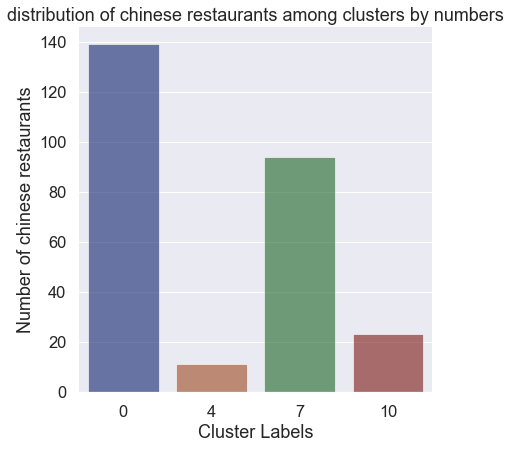

In [1047]:
chinese_res_cluter_view= sns.catplot(data=chinese_res_cluster_v, kind="bar",
    x="Cluster Labels", y="neighborhood", 
    ci="sd", palette="dark", alpha=.6, height=6,aspect=1
)
chinese_res_cluter_view.despine(left=True)
chinese_res_cluter_view.set(title="distribution of chinese restaurants among clusters by numbers")


chinese_res_cluter_view.set_axis_labels("Cluster Labels", "Number of chinese restaurants")

chinese_res_cluter_view.savefig('distribution-of-chinese-restaurants-among-clusters-by-numbers.png')



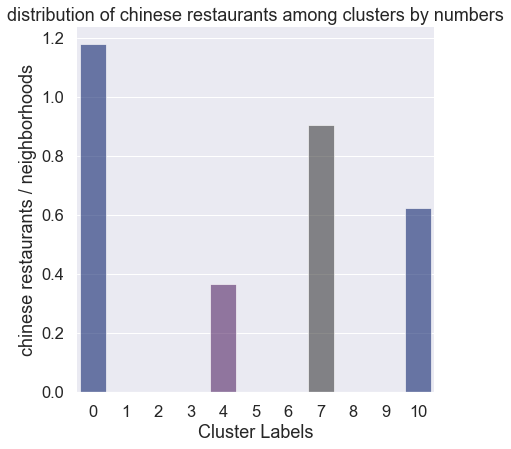

In [1031]:
chinese_res_cluster_view= sns.catplot(data=chinese_res_cluster_ratio, kind="bar",
    x="Cluster Labels", y="ratio", 
    ci="sd", palette="dark", alpha=.6, height=6,aspect=1
)
chinese_res_cluster_view.despine(left=True)
chinese_res_cluster_view.set(title="distribution of chinese restaurants among clusters by numbers")


chinese_res_cluster_view.set_axis_labels("Cluster Labels", "chinese restaurants / neighborhoods")
chinese_res_cluster_view.savefig('distribution-of-chinese-restaurants-among-clusters-by-ratio.png')


In [1099]:
import numpy as np
address = 'New York City, New York'
geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
map_chinese_restaurant_clusters=folium.Map(location=[latitude, longitude],zoom_start=11)
x=np.arange(kclusters)
#print(range(kclusters))
ys=[i+x+(i*x)**2 for i in range(kclusters)]
ys

import matplotlib.cm as cm
import matplotlib.colors as colors
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
colors_array
rainbow=[colors.rgb2hex(i) for i in colors_array]
rainbow

markers_colors = []
for lat, lon, poi, cluster in zip(chinese_res_cluster['venue_lat'], chinese_res_cluster['venue_lng'], chinese_res_cluster['neighborhood'], chinese_res_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_chinese_restaurant_clusters)
       

map_chinese_restaurant_clusters

In [1038]:
!pip install selenium
 
import os
import time
from selenium import webdriver
 


In [1100]:
delay=5
 
#Save the map as an HTML file
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_chinese_restaurant_clusters.save(fn)
 
#Open a browser window...
browser = webdriver.Chrome()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('chinese-restaurants-colored-by-clusters.png')
#Close the browser
browser.quit()

Chinese Restaurants are mainly in cluster 0,4,7,10.

### Explore the distribution of  authentic Chinese Restaurant among different clusters

In [954]:
aut_chinese_res_cluster=aut_chinese_res.merge(newyork_merged.iloc[:,:5],how="left",on=['neighborhood','borough'])

In [982]:
aut_chinese_res_cluster.groupby(['Cluster Labels','neighborhood']).count().reset_index().sort_values(by=['borough'],ascending=False).head(8)

,Cluster Labels,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng,lat,lng
4,0,Chinatown,10,10,10,10,10,10,10,10,10
9,0,Flushing,10,10,10,10,10,10,10,10,10
0,0,Bath Beach,2,2,2,2,2,2,2,2,2
7,0,Downtown,2,2,2,2,2,2,2,2,2
24,7,Bensonhurst,2,2,2,2,2,2,2,2,2
16,0,Long Island City,2,2,2,2,2,2,2,2,2
15,0,Little Neck,2,2,2,2,2,2,2,2,2
6,0,Cobble Hill,1,1,1,1,1,1,1,1,1


In [972]:
aut_chinese_res_cluster_v=aut_chinese_res_cluster.groupby(['Cluster Labels']).count().reset_index()
aut_chinese_res_cluster_v

,Cluster Labels,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng,lat,lng
0,0,46,46,46,46,46,46,46,46,46,46
1,7,7,7,7,7,7,7,7,7,7,7


In [998]:
aut_chinese_res_cluster_ratio=aut_chinese_res_cluster_v.merge(newyork_merged_view_1, how='right',on=['Cluster Labels'])
aut_chinese_res_cluster_ratio=aut_chinese_res_cluster_ratio.fillna(0)

aut_chinese_res_cluster_ratio['ratio']=aut_chinese_res_cluster_ratio['neighborhood_x']/aut_chinese_res_cluster_ratio['neighborhood_y']
aut_chinese_res_cluster_ratio=aut_chinese_res_cluster_ratio[['Cluster Labels','neighborhood_x','neighborhood_y','ratio']]
aut_chinese_res_cluster_ratio

,Cluster Labels,neighborhood_x,neighborhood_y,ratio
0,0,46.0,118,0.389831
1,1,0.0,1,0.000000
2,2,0.0,4,0.000000
3,3,0.0,7,0.000000
4,4,0.0,30,0.000000
5,5,0.0,1,0.000000
6,6,0.0,2,0.000000
7,7,7.0,104,0.067308
8,8,0.0,1,0.000000
9,9,0.0,1,0.000000


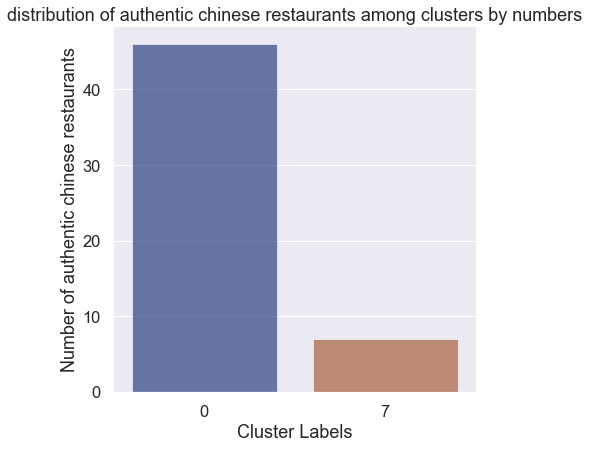

In [1055]:
aut_chinese_res_cluter_view= sns.catplot(data=aut_chinese_res_cluster_v, kind="bar",
    x="Cluster Labels", y="neighborhood", 
    ci="sd", palette="dark", alpha=.6, height=6,aspect=1
)
aut_chinese_res_cluter_view.despine(left=True)
aut_chinese_res_cluter_view.set(title="distribution of authentic chinese restaurants among clusters by numbers")


aut_chinese_res_cluter_view.set_axis_labels("Cluster Labels", "Number of authentic chinese restaurants")
aut_chinese_res_cluter_view.savefig('distribution-of-authentic-chinese-restaurants-among-clusters-by-numbers')


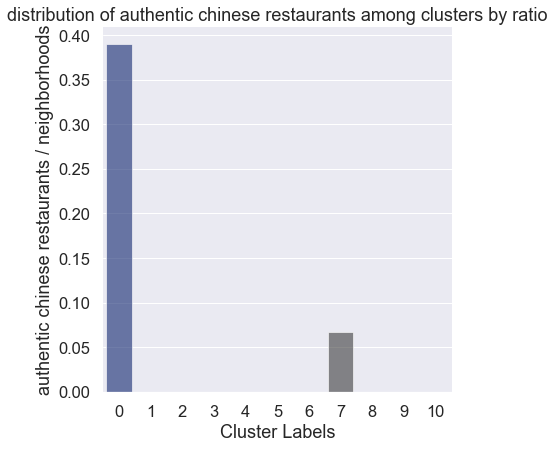

In [1056]:
aut_chinese_res_cluster_view= sns.catplot(data=aut_chinese_res_cluster_ratio, kind="bar",
    x="Cluster Labels", y="ratio", 
    ci="sd", palette="dark", alpha=.6, height=6,aspect=1
)
aut_chinese_res_cluster_view.despine(left=True)
aut_chinese_res_cluster_view.set(title="distribution of authentic chinese restaurants among clusters by ratio")


aut_chinese_res_cluster_view.set_axis_labels("Cluster Labels", "authentic chinese restaurants / neighborhoods")
aut_chinese_res_cluster_view.savefig('distribution-of-authentic-chinese-restaurants-among-clusters-by-ratio')

In [951]:
aut_chinese_res_cluster[aut_chinese_res_cluster['Cluster Labels']!=0]

,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng,lat,lng,Cluster Labels
1,Bensonhurst,Brooklyn,40.611009,-73.995180,Hand Pull Noodle & Dumpling House,Noodle House,40.615103,-73.994224,40.611009,-73.995180,7
2,Bensonhurst,Brooklyn,40.611009,-73.995180,18 Hipot,Hotpot Restaurant,40.609241,-74.000207,40.611009,-73.995180,7
41,Rego Park,Queens,40.728974,-73.857827,The Bund,Shanghai Restaurant,40.726499,-73.853034,40.728974,-73.857827,7
45,Douglaston,Queens,40.766846,-73.742498,Shanghai Dumpling,Shanghai Restaurant,40.768208,-73.738335,40.766846,-73.742498,7
46,Queensboro Hill,Queens,40.744572,-73.825809,Kung Fu Xiao Long Bao,Dumpling Restaurant,40.743380,-73.825741,40.744572,-73.825809,7
48,Forest Hills Gardens,Queens,40.714611,-73.841022,Xin Taste Lan Zhou Hand Pull Noodle,Noodle House,40.718713,-73.841555,40.714611,-73.841022,7
49,New Dorp,Staten Island,40.572572,-74.116479,Jade Asian Bistro,Dim Sum Restaurant,40.571484,-74.111447,40.572572,-74.116479,7


In [1097]:
address = 'New York City, New York'
geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
map_aut_chinese_restaurant_clusters=folium.Map(location=[latitude, longitude],zoom_start=11)
x=np.arange(kclusters)
ys=[i+x+(i*x)**2 for i in range(kclusters)]


markers_colors = []
for lat, lon, poi, cluster in zip(aut_chinese_res_cluster['venue_lat'], aut_chinese_res_cluster['venue_lng'], aut_chinese_res_cluster['neighborhood'], aut_chinese_res_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_aut_chinese_restaurant_clusters)
       
map_aut_chinese_restaurant_clusters

In [1098]:
delay=5
 
#Save the map as an HTML file
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_aut_chinese_restaurant_clusters.save(fn)
 
#Open a browser window...
browser = webdriver.Chrome()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('authentic-chinese-restaurants-colored-by-clusters.png')
#Close the browser
browser.quit()

Authentic chinese restaurants are mainly(46) in cluster 0, which means that if you want to open an authentic chinese restaurant, you need a location with lots of foot traffic. 

The 2 biggest chinatown, chinatown(Manhattan) and flusing(Queens) each has 10 authentic chinese restaurants. No doubt high density chinese population is super important for opening a authentic chinese restaurant. But these areas are too competitive and expensive.

On the map, we can see 4 other areas that would be more cost-effective for authentic chinese restaurant. 

1. Bayside-Douglaston-Little Neck area, which is along norther blvd and can be conveniently reached either by train or bus.  Chinese people are spreading further along northern blvd from flushing, now little neck is  becoming another chinatown.

2. Thriving long island city area;

3. Bensonhurst-bath beach in brooklyn. Bensohurt is already 3rd biggest chinatown in new york city, and it is in cluster 7, not very expensive yet. 

4. brooklyn downtown and waterfront area, which are thriving new neighborhoods and it seems that authentic chinese food is well received there.

### Explore the distribution of American Chinese Restaurant among different clusters

In [957]:
ame_chinese_res_cluster=ame_chinese_res.merge(newyork_merged.iloc[:,:5],how="left",on=['neighborhood','borough'])

In [1052]:
ame_chinese_res_cluster_v=ame_chinese_res_cluster.groupby(['Cluster Labels']).count().reset_index()
ame_chinese_res_cluster_v

,Cluster Labels,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng,lat,lng
0,0,31,31,31,31,31,31,31,31,31,31
1,4,8,8,8,8,8,8,8,8,8,8
2,7,60,60,60,60,60,60,60,60,60,60
3,10,15,15,15,15,15,15,15,15,15,15


In [999]:
ame_chinese_res_cluster_ratio=ame_chinese_res_cluster_v.merge(newyork_merged_view_1, how='right',on=['Cluster Labels'])
ame_chinese_res_cluster_ratio=ame_chinese_res_cluster_ratio.fillna(0)

ame_chinese_res_cluster_ratio['ratio']=ame_chinese_res_cluster_ratio['neighborhood_x']/ame_chinese_res_cluster_ratio['neighborhood_y']
ame_chinese_res_cluster_ratio=ame_chinese_res_cluster_ratio[['Cluster Labels','neighborhood_x','neighborhood_y','ratio']]
ame_chinese_res_cluster_ratio

,Cluster Labels,neighborhood_x,neighborhood_y,ratio
0,0,31.0,118,0.262712
1,1,0.0,1,0.000000
2,2,0.0,4,0.000000
3,3,0.0,7,0.000000
4,4,8.0,30,0.266667
5,5,0.0,1,0.000000
6,6,0.0,2,0.000000
7,7,60.0,104,0.576923
8,8,0.0,1,0.000000
9,9,0.0,1,0.000000


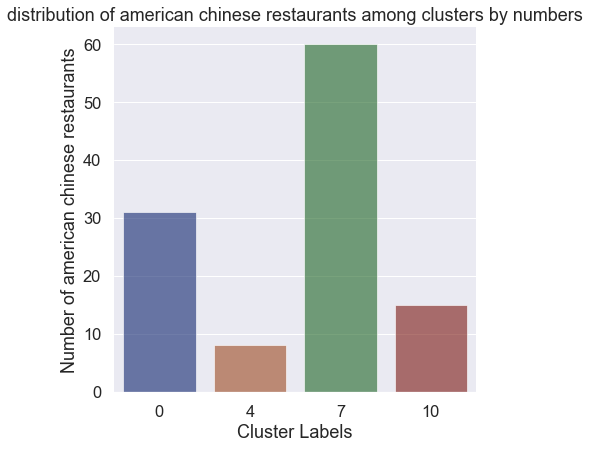

In [1054]:
ame_chinese_res_cluster_view= sns.catplot(data=ame_chinese_res_cluster_v, kind="bar",
    x="Cluster Labels", y="neighborhood", 
    ci="sd", palette="dark", alpha=.6, height=6,aspect=1
)
ame_chinese_res_cluster_view.despine(left=True)
ame_chinese_res_cluster_view.set(title="distribution of american chinese restaurants among clusters by numbers")


ame_chinese_res_cluster_view.set_axis_labels("Cluster Labels", "Number of american chinese restaurants")
ame_chinese_res_cluster_view.savefig('distribution-of-american-chinese-restaurants-among-clusters-by-numbers.png')

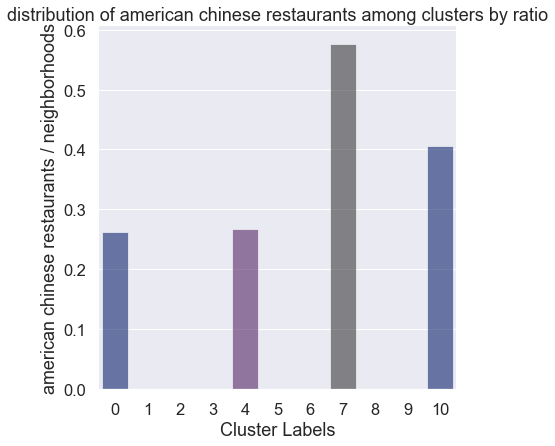

In [1103]:
ame_chinese_res_cluster_view= sns.catplot(data=ame_chinese_res_cluster_ratio, kind="bar",
    x="Cluster Labels", y="ratio", 
    ci="sd", palette="dark", alpha=.6, height=6,aspect=1
)
ame_chinese_res_cluster_view.despine(left=True)
ame_chinese_res_cluster_view.set(title="distribution of american chinese restaurants among clusters by ratio")


ame_chinese_res_cluster_view.set_axis_labels("Cluster Labels", "american chinese restaurants / neighborhoods")
ame_chinese_res_cluster_view.savefig('distribution-of-american-chinese-restaurants-among-clusters-by-ratio.png')

In [1095]:
map_ame_chinese_res_clusters=folium.Map(location=[latitude, longitude],zoom_start=11)


markers_colors = []
for venue,lat, lon, poi, cluster in zip(ame_chinese_res_cluster['venue'],ame_chinese_res_cluster['venue_lat'], ame_chinese_res_cluster['venue_lng'], ame_chinese_res_cluster['neighborhood'], ame_chinese_res_cluster['Cluster Labels']):
    label = folium.Popup(str(venue) +' ' + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_ame_chinese_res_clusters)
       
map_ame_chinese_res_clusters

In [1096]:
delay=5
 
#Save the map as an HTML file
fn='testmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map_ame_chinese_res_clusters.save(fn)
 
#Open a browser window...
browser = webdriver.Chrome()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('american-chinese-restaurants-colored-by-clusters.png')
#Close the browser
browser.quit()

Chinese-Ameican food adapted to american people by adding American vegetables like celery, broccoli, and bell peppers; replacing pork with beef beef and shrimp. Recipes were also adapted to sweet and sour American tastes, avoiding strong flavors like fish sauce and spicy ingridients.  The result was such signatures as chop suey, chow mein, egg foo yung, beef with broccoli, and m General Tso’s chicken. 

We can see american chinese restaurants are located in cluster 0,4,7,10, although by number it looks like cluster 0 and 7 has more american chinese restaurant, by ratio, cluster 7 and 10 are higher. 

Given american american chinese food are well received by american people and lots of Americanized chinese restaurants only do take-outs, so if you want to open an american chinese restaurant, it doesn't need to be in a busy area or in an area with lots of chinese people. These neighborhood in cluster 7 and 10 that don't have or have very few chinese restaurants now might be a good choice.


In [1009]:
chinese_res.groupby('neighborhood').count()

,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng
neighborhood,,,,,,,
Allerton,1,1,1,1,1,1,1
Astoria Heights,1,1,1,1,1,1,1
Bath Beach,4,4,4,4,4,4,4
Battery Park City,1,1,1,1,1,1,1
Bay Ridge,4,4,4,4,4,4,4
Bayside,3,3,3,3,3,3,3
Bedford Park,4,4,4,4,4,4,4
Beechhurst,1,1,1,1,1,1,1
Bellaire,1,1,1,1,1,1,1


In [1017]:
top_10_label=top_10.iloc[:,:3]
chinese_res_fil=top_10_label.merge(chinese_res, how ='left',on=['borough','neighborhood'])
chinese_res_fil=chinese_res_fil.fillna(0)
chinese_res_fil=chinese_res_fil[chinese_res_fil['venue']==0]
chinese_res_fil

,Cluster Labels,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng
1,7,Baychester,Bronx,0.0,0.0,0,0,0.0,0.0
9,7,Castle Hill,Bronx,0.0,0.0,0,0,0.0,0.0
10,0,City Island,Bronx,0.0,0.0,0,0,0.0,0.0
12,2,Clason Point,Bronx,0.0,0.0,0,0,0.0,0.0
15,7,Concourse Village,Bronx,0.0,0.0,0,0,0.0,0.0
16,7,Country Club,Bronx,0.0,0.0,0,0,0.0,0.0
19,7,Edenwald,Bronx,0.0,0.0,0,0,0.0,0.0
22,10,Fieldston,Bronx,0.0,0.0,0,0,0.0,0.0
30,7,Hunts Point,Bronx,0.0,0.0,0,0,0.0,0.0
31,7,Kingsbridge,Bronx,0.0,0.0,0,0,0.0,0.0


In [1020]:
chinese_res_op=chinese_res_fil.groupby('Cluster Labels').count()
chinese_res_op

,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng
Cluster Labels,,,,,,,,
0,56,56,56,56,56,56,56,56
1,1,1,1,1,1,1,1,1
2,4,4,4,4,4,4,4,4
3,7,7,7,7,7,7,7,7
4,23,23,23,23,23,23,23,23
5,1,1,1,1,1,1,1,1
6,2,2,2,2,2,2,2,2
7,55,55,55,55,55,55,55,55
8,1,1,1,1,1,1,1,1


In [1105]:
chinese_res_fil[chinese_res_fil['Cluster Labels']==10].reset_index(drop=True)

,Cluster Labels,neighborhood,borough,n_lat,n_lng,venue,category,venue_lat,venue_lng
0,10,Fieldston,Bronx,0.0,0.0,0,0,0.0,0.0
1,10,Morrisania,Bronx,0.0,0.0,0,0,0.0,0.0
2,10,Riverdale,Bronx,0.0,0.0,0,0,0.0,0.0
3,10,Williamsbridge,Bronx,0.0,0.0,0,0,0.0,0.0
4,10,Bergen Beach,Brooklyn,0.0,0.0,0,0,0.0,0.0
5,10,Broadway Junction,Brooklyn,0.0,0.0,0,0,0.0,0.0
6,10,Coney Island,Brooklyn,0.0,0.0,0,0,0.0,0.0
7,10,Dyker Heights,Brooklyn,0.0,0.0,0,0,0.0,0.0
8,10,Erasmus,Brooklyn,0.0,0.0,0,0,0.0,0.0
9,10,Remsen Village,Brooklyn,0.0,0.0,0,0,0.0,0.0


The neighborhoods listed above might be a good start for opening an american chinese restaurant.